In [322]:
import pandas as pd
import statsmodels.api as sm
import plotly.plotly as py
import math
import re

%matplotlib inline

In [251]:
df = pd.read_csv('data/chipotle_df.csv')

In [252]:
df['Date'] = pd.to_datetime(df.Date)
df['address'] = df_piv['address'].apply(lambda x: re.sub('\(\d{5}\).*,', '', x))

In [255]:
len(df)

76

In [288]:
df_piv = df.groupby(['store_no','lat','lon','state']).agg({'Amount':['sum','count','mean']}).reset_index()

In [282]:
df_piv

address store_no    lat     lon  \
                                                                               
0                      0043 - Westbank- Austin 78746      114  39.96 -105.14   
1                0054 - 6th & Broadway- Denver 80203      894  40.02 -105.25   
2                  0056 - 45th & Lamar- Austin 78756      894  40.02 -105.25   
3                0114 - Louisville- Louisville 80027      894  40.02 -105.25   
4          0436 - Grand Central- New York 10017-4068      894  40.02 -105.25   
5           0437 - Director Building- Portland 97204      894  40.02 -105.25   
6      0839 - 525 Market Street- San Francisco 94105     1702  37.77 -122.41   
7             0894 - 29th Street- Boulder 80301-1013     1702  37.77 -122.41   
8                  1102 - Daly City- Daly City 94015     1702  37.77 -122.41   
9            1145 - London Square Relo- Aurora 80247     1460  37.77 -122.41   
10               1174 - San Carlos- San Carlos 94070     1702  37.77 -122.41   
11                         1187 - Colma- Colma 94014      839  37.78 -122.39   
12          1230 - Union Square- San Francisco 94102      894  40.02 -105.25   
13                 1265 - Palo Alto- Palo Alto 94306     1145  39.69 -104.88   
14               1460 - Metreon- San Francisco 94103     1702  37.77 -122.41   
15       1611 - El Monte Center- Mountain View 94040     1702  37.77 -122.41   
16           1617 - Stanford Center- Palo Alto 94304     1702  37.77 -122.41   
17       1637 - Lakeshore Plaza- San Francisco 94132     1702  37.77 -122.41   
18  1702 - San Francisco Centre- San Francisco 94103     1702  37.77 -122.41   
19           1738 - Oakland Lakeshore- Oakland 94610     1702  37.77 -122.41   
20   2080 - Stonestown Galleria- San Francisco 94132     1702  37.77 -122.41   
21          2341 - 553 Boylston Street- Boston 02116     1702  37.77 -122.41   
22        2345 - Miracle Mile Shops- Las Vegas 89109     1702  37.77 -122.41   

   state Amount               
            sum count   mean  
0     CO  10.59     1  10.59  
1     CO  18.26     1  18.26  
2     CO  12.86     1  12.86  
3     CO   5.45     1   5.45  
4     CO  10.79     1  10.79  
5     CO  10.30     1  10.30  
6     CA  15.29     1  15.29  
7     CA  11.22     1  11.22  
8     CA  12.13     1  12.13  
9     CA  12.00     1  12.00  
10    CA  10.04     1  10.04  
11    CA  14.35     1  14.35  
12    CO  10.63     1  10.63  
13    CO   9.99     1   9.99  
14    CA   9.52     1   9.52  
15    CA   9.52     1   9.52  
16    CA   9.52     1   9.52  
17    CA  12.13     1  12.13  
18    CA  10.93     1  10.93  
19    CA  10.93     1  10.93  
20    CA  12.13     1  12.13  
21    CA  11.26     1  11.26  
22    CA   9.52     1   9.52

In [284]:
df[df['store_no']==894]

,Unnamed: 0,Date,Description,Original Description,Amount,Transaction Type,Account Name,store_no,store_no.1,zip_code,address,lat,lon,city,state
1,1,2018-02-28,Chipotle,CHIPOTLE 0894,10.63,debit,CREDIT CARD,894,894,80301,1230 - Union Square- San Francisco 94102,40.02,-105.25,BOULDER,CO
2,2,2018-02-15,Chipotle,CHIPOTLE 0894,18.26,debit,CREDIT CARD,894,894,80301,0054 - 6th & Broadway- Denver 80203,40.02,-105.25,BOULDER,CO
3,3,2018-01-25,Chipotle,CHIPOTLE 0894,12.86,debit,CREDIT CARD,894,894,80301,0056 - 45th & Lamar- Austin 78756,40.02,-105.25,BOULDER,CO
4,4,2018-01-25,Chipotle,CHIPOTLE 0894,5.45,debit,CREDIT CARD,894,894,80301,0114 - Louisville- Louisville 80027,40.02,-105.25,BOULDER,CO
5,5,2018-01-07,Chipotle,CHIPOTLE 0894,10.79,debit,CREDIT CARD,894,894,80301,0436 - Grand Central- New York 10017-4068,40.02,-105.25,BOULDER,CO
10,10,2016-12-25,Chipotle,CHIPOTLE 0894,10.30,debit,CREDIT CARD,894,894,80301,0437 - Director Building- Portland 97204,40.02,-105.25,BOULDER,CO


In [276]:
df_piv.text = '\n'.join(df[['address', 'Amount'['sum']]])

TypeError: string indices must be integers

In [291]:
import plotly.plotly as py
from plotly.graph_objs import *

scale = .5

data = Data([
    dict(type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_piv['lon'],
        lat = df_piv['lat'],
        text = '',
        marker = dict(
            size = (df_piv['Amount']['sum'])/scale,
            color = df_piv['Amount']['mean'],
            colorscale = 'Greens',
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        )
])


layout = dict(
        title = 'blah',
        showlegend = False,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

,Unnamed: 0,Date,Description,Original Description,Amount,Transaction Type,Account Name,store_no,store_no.1,zip_code,address,lat,lon,city,state
0,0,2018-03-19,Chipotle,CHIPOTLE 0114,10.59,debit,CREDIT CARD,114,114,80027,0043 - Westbank- Austin 78746,39.96,-105.14,LOUISVILLE,CO
1,1,2018-02-28,Chipotle,CHIPOTLE 0894,10.63,debit,CREDIT CARD,894,894,80301,1230 - Union Square- San Francisco 94102,40.02,-105.25,BOULDER,CO
2,2,2018-02-15,Chipotle,CHIPOTLE 0894,18.26,debit,CREDIT CARD,894,894,80301,0054 - 6th & Broadway- Denver 80203,40.02,-105.25,BOULDER,CO
3,3,2018-01-25,Chipotle,CHIPOTLE 0894,12.86,debit,CREDIT CARD,894,894,80301,0056 - 45th & Lamar- Austin 78756,40.02,-105.25,BOULDER,CO
4,4,2018-01-25,Chipotle,CHIPOTLE 0894,5.45,debit,CREDIT CARD,894,894,80301,0114 - Louisville- Louisville 80027,40.02,-105.25,BOULDER,CO


In [293]:
df.head()

,Unnamed: 0,Date,Description,Original Description,Amount,Transaction Type,Account Name,store_no,store_no.1,zip_code,address,lat,lon,city,state
0,0,2018-03-19,Chipotle,CHIPOTLE 0114,10.59,debit,CREDIT CARD,114,114,80027,0043 - Westbank- Austin 78746,39.96,-105.14,LOUISVILLE,CO
1,1,2018-02-28,Chipotle,CHIPOTLE 0894,10.63,debit,CREDIT CARD,894,894,80301,1230 - Union Square- San Francisco 94102,40.02,-105.25,BOULDER,CO
2,2,2018-02-15,Chipotle,CHIPOTLE 0894,18.26,debit,CREDIT CARD,894,894,80301,0054 - 6th & Broadway- Denver 80203,40.02,-105.25,BOULDER,CO
3,3,2018-01-25,Chipotle,CHIPOTLE 0894,12.86,debit,CREDIT CARD,894,894,80301,0056 - 45th & Lamar- Austin 78756,40.02,-105.25,BOULDER,CO
4,4,2018-01-25,Chipotle,CHIPOTLE 0894,5.45,debit,CREDIT CARD,894,894,80301,0114 - Louisville- Louisville 80027,40.02,-105.25,BOULDER,CO


In [339]:
bar = df['Date'][1]
bar.day

28

In [402]:
df['day_of_week'] = df['Date'].dt.dayofweek
df['day_of_month'] = (df['Date']).apply(lambda x: x.day)

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

season_str = {1:"Winter", 2:"Spring", 3:"Summer", 4:"Autumn"}
df['season'] = df.Date.apply(lambda x:  (x.month%12+3)//3 ).apply(lambda x: season_str[x])

df['month'] = df.Date.apply(lambda x: x.month)

In [430]:
hm = df.pivot_table(index='season', columns='day_of_week', values='Amount', aggfunc='sum')
hm.fillna(0, inplace=True)
hm = hm[list(days.values())]
hm = hm.reindex(['Winter','Autumn','Summer','Spring'])

In [431]:
hm

day_of_week,Mon,Tues,Weds,Thurs,Fri,Sat,Sun
season,,,,,,,
Winter,30.95,0.00,18.41,43.87,0.00,0.00,90.19
Autumn,73.01,0.00,0.00,12.00,14.35,19.52,87.45
Summer,62.68,19.98,7.29,32.63,16.33,25.37,63.28
Spring,97.18,0.00,20.55,0.00,20.16,9.21,37.35


In [432]:
print(list(hm.values))

trace = Heatmap(z=[hm.values[x] for x in range(0,len(hm.values))],
               x=hm.columns, y = hm.index)
data=[trace]
py.iplot(data, filename='basic-heatmap')

[array([30.95,  0.  , 18.41, 43.87,  0.  ,  0.  , 90.19]), array([73.01,  0.  ,  0.  , 12.  , 14.35, 19.52, 87.45]), array([62.68, 19.98,  7.29, 32.63, 16.33, 25.37, 63.28]), array([97.18,  0.  , 20.55,  0.  , 20.16,  9.21, 37.35])]


In [325]:
# Create a trace
trace = Scatter(
    y = df['Amount'],
    x = df['Date']
)

trace2 = Scatter(x = df['Date'], y = [df['Amount'].mean()]*len(df))

data = [trace, trace2]

py.iplot(data, filename='basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~t-jayw/0 or inside your plot.ly account where it is named 'basic-line'


In [311]:
x = df.index
y = df['Amount']
regression = sm.OLS(x,y).fit()
regression.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     127.5
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           7.65e-18
Time:                        13:31:39   Log-Likelihood:                -356.73
No. Observations:                  76   AIC:                             715.5
Df Residuals:                      75   BIC:                             717.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Amount         3.1863      0.282     11.292      0.000       2.624       3.748
==============================================================================
Omnibus:                        9.822   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                3.215
Skew:                           0.036   Prob(JB):                        0.200
Kurtosis:                       1.995   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
foo = regression.predict(df.index)

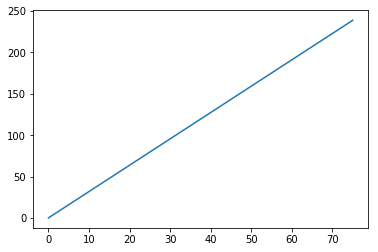

In [323]:
pd.Series(foo).plot()

In [326]:
bar = df.Amount.cumsum()

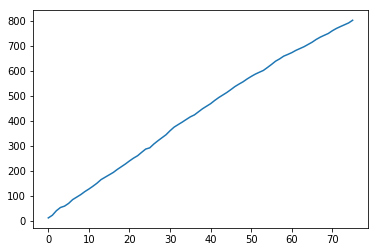

In [328]:
bar.plot()